На этот раз ситуация следующая: вы работаете в приложении по доставке готовых продуктов. К вам пришел коллега с результатами двух тестов:

В первом тестировали разрешение фотографий блюд в приложении: пользователям показывались либо прямоугольные, либо новые квадратные 
Во втором: была обновлена кнопка заказа, и часть юзеров видела старый вариант, а часть – новый
Коллега пришел к вам с просьбой: он посмотрел на графики и предположил, что среди групп могут встретиться различия. Ваша задача – помочь ему проверить гипотезы, сделать соответствующие выводы на основе статистических тестов и принять решения.

Задания:
Выберите метод, который предположительно подойдет в первом вопросе.
Проверьте, являются ли дисперсии внутри групп гомогенными.
Проведите тест на нормальность распределения.
Сравните средние в представленных группах.
Используйте критерий Тьюки и определите, между какими группами есть статистически значимые различия. 
Примите решение: какие картинки в итоге будем использовать?
Выберите метод для второго теста.
Визуализируйте распределение events для контрольной и тестовой групп. 
Посмотрите на описательные статистики events в разбивке по группе и по сегменту пользователя. 
- 11.Выберите формулу для модели, проведите тест.
Описание данных
5_task_1:

id – id клиента в эксперименте
group – в каком разрешении показывались картинки (A – прямоугольные 16:9, B – квадратные, C – прямоугольные 12:4)
events – сколько блюд суммарно было заказано за период
5_task_2:

id – id клиента в эксперименте
segment – сегмент (high/low)
group – вид кнопки (control – старая версия, test – новая версия)
events – сколько блюд суммарно было заказано за период

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [68]:
df1 = pd.read_csv('5_task_1 (1).csv')

In [69]:
df1.head()

,id,group,events
0,16046,A,14
1,18712,A,41
2,3268,A,30
3,22633,A,37
4,28071,A,38


In [70]:
df2 = pd.read_csv('5_task_2 (1).csv')

In [71]:
df1.group.unique()

array(['A', 'B', 'C'], dtype=object)

In [72]:
import scipy.stats

In [73]:
a = df1.query('group=="A"').events
b = df1.query('group=="B"').events
c = df1.query('group=="C"').events

In [74]:
scipy.stats.levene(a, b, c)

LeveneResult(statistic=2.2622596339318037, pvalue=0.1041327199523974)

P>0.05, мы не отвергаем 0 гипотезу

In [76]:
import matplotlib.pyplot as plt
import seaborn as sns

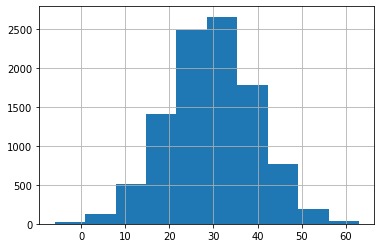

In [77]:
a.hist()

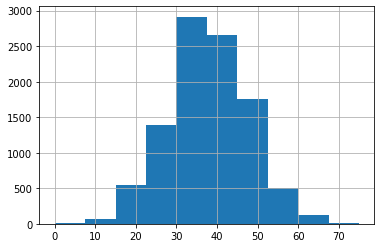

In [78]:
b.hist()

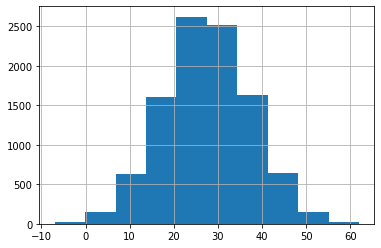

In [79]:
c.hist()

In [80]:
scipy.stats.normaltest(a)

NormaltestResult(statistic=2.1034599402238734, pvalue=0.3493328906085719)

In [81]:
scipy.stats.normaltest(b)

NormaltestResult(statistic=0.8410715800223014, pvalue=0.6566948749848232)

In [82]:
scipy.stats.normaltest(c)

NormaltestResult(statistic=3.243725809054571, pvalue=0.19753037588314626)

In [83]:
#p>0.05, 0 гипотеза ок

In [84]:
import statsmodels.api as sm
import pylab

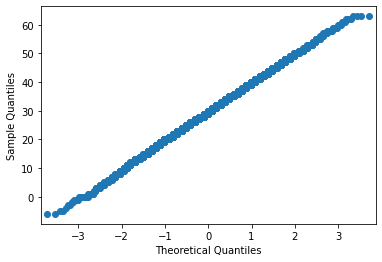

In [85]:
sm.qqplot(a)
plt.show()

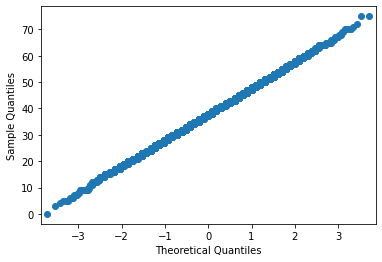

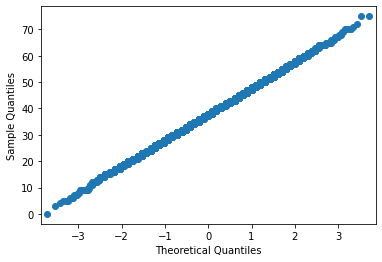

In [86]:
sm.qqplot(b)

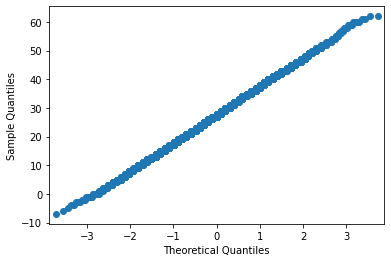

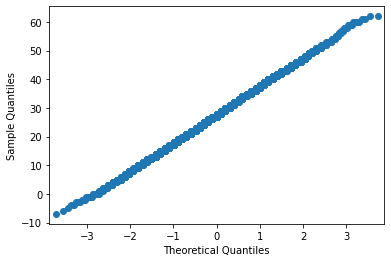

In [87]:
sm.qqplot(c)

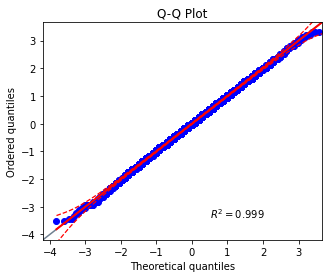

In [88]:
pg.qqplot(a, dist='norm', confidence=0.95)

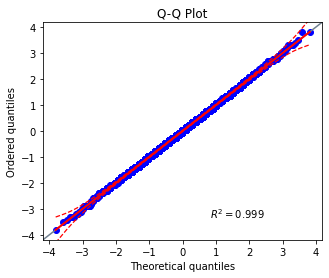

In [89]:
pg.qqplot(b, dist='norm', confidence=0.95)

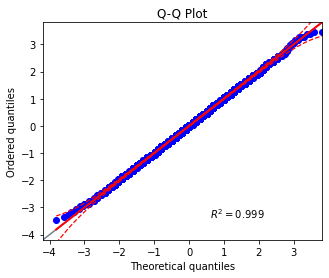

In [90]:
pg.qqplot(c, dist='norm', confidence=0.95)

In [ ]:
Самое время провести тест! 

In [91]:
pg.anova(data=df1, dv='events', between='group')

,Source,ddof1,ddof2,F,p-unc,np2
0,group,2,29997,2886.166657,0.0,0.161377


In [92]:
#второй вариант scipy.stats.f_oneway()

In [93]:
scipy.stats.f_oneway(a, b, c)

F_onewayResult(statistic=2886.166657438961, pvalue=0.0)

Однофакторный дисперсионный анализ («дисперсионный анализ») сравнивает средние значения трех или более независимых групп,
чтобы определить, существует ли статистически значимая разница между соответствующими средними значениями генеральной
совокупности. https://www.codecamp.ru/blog/one-way-anova/

Если p-значение меньше выбранного вами уровня значимости (например, 0,05), то вы можете отклонить нулевую гипотезу 
и сделать вывод, что по крайней мере одно из средних значений генеральной совокупности отличается от других.

Теперь используйте критерий Тьюки и определите, между какими группами есть статистически значимые различия. 

Дополнительно: попробуйте другие варианты поправок на множественные сравнения через pingouin. 
Дают ли они те же выводы, что и Тьюки?

In [97]:
pg.pairwise_tukey(data=df1, dv='events', between='group')

,A,B,mean(A),mean(B),diff,se,T,p-tukey,hedges
0,A,B,29.5796,37.6136,-8.0340,0.140894,-57.021604,0.001,-0.806377
1,A,C,29.5796,27.4703,2.1093,0.140894,14.970833,0.001,0.211712
2,B,C,37.6136,27.4703,10.1433,0.140894,71.992436,0.001,1.018089


In [99]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [106]:
pairwise_tukeyhsd(endog= df1.events, groups=df1.group, alpha=0.05).summary()

group1,group2,meandiff,p-adj,lower,upper,reject
A,B,8.034,0.001,7.7038,8.3642,True
A,C,-2.1093,0.001,-2.4395,-1.7791,True
B,C,-10.1433,0.001,-10.4735,-9.8131,True


In [107]:
a.mean()

29.5796

In [108]:
b.mean()

37.6136

In [109]:
c.mean()

27.4703

In [111]:
df2

,id,group,segment,events
0,83440,test,high,78.0
1,96723,test,high,71.0
2,68719,test,high,80.0
3,50399,test,high,80.0
4,95613,test,high,78.0
...,...,...,...,...
99995,60695,control,low,15.0
99996,5934,control,low,16.0
99997,30046,control,low,22.0
99998,26474,control,low,21.0


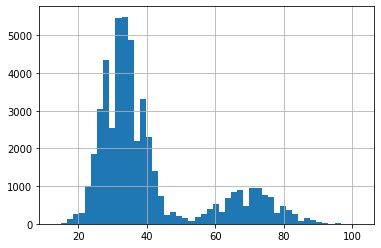

In [120]:
t = df2.query('group=="test"').events.hist(bins=50)
t

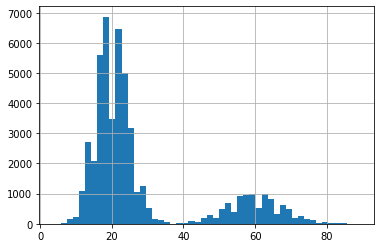

In [121]:
c= df2.query('group=="control"').events.hist(bins=50)
c

Посчитайте среднее, медиану и стандартное отклонение events в разбивке по группе и по сегменту пользователя. 

В качестве ответа укажите стандартное отклонение для пользователей из сегмента high и контрольной группы, с точностью до 2
знаков после точки.

In [135]:
df2.segment.unique()

array(['high', 'low'], dtype=object)

In [145]:
df2.query('group=="control" & segment=="high"').events.describe()

count    10000.000000
mean        59.970800
std          7.805347
min         31.000000
25%         55.000000
50%         60.000000
75%         65.000000
max         89.000000
Name: events, dtype: float64

In [146]:
round(7.805347, 2)

7.81

In [141]:
df2.query('group=="control" & segment=="low"').describe()

,id,events
count,40000.000000,40000.000000
mean,49935.256700,20.031575
std,28855.849243,4.473576
min,0.000000,4.000000
25%,25022.250000,17.000000
50%,49944.500000,20.000000
75%,74874.250000,23.000000
max,99999.000000,41.000000


In [143]:
df2.query('group=="test" & segment=="high"').describe()

,id,events
count,10000.000000,10000.000000
mean,50126.620600,69.938500
std,28821.133487,8.403974
min,14.000000,40.000000
25%,25317.500000,64.000000
50%,50234.500000,70.000000
75%,74783.250000,76.000000
max,99996.000000,102.000000


In [144]:
df2.query('group=="test" & segment=="low"').describe()

,id,events
count,40000.000000,40000.000000
mean,49913.343600,33.025925
std,28917.383492,5.720845
min,1.000000,13.000000
25%,24763.750000,29.000000
50%,49706.500000,33.000000
75%,75127.250000,37.000000
max,99995.000000,59.000000


Почти у цели – осталось выбрать формулу для модели. Напомним, что мы хотим проверить эффект нескольких переменных – 
group и segment – на events, с взаимодействием факторов.

Если вы прибегнете к statsmodels, то какую формулу используете?

In [147]:
from statsmodels.multivariate.manova import MANOVA

In [155]:
print(MANOVA.from_formula('group + segment + group:segment ~ events', data=df2).mv_test())

                                   Multivariate linear model
                                                                                                
------------------------------------------------------------------------------------------------
       Intercept                Value         Num DF   Den DF            F Value          Pr > F
------------------------------------------------------------------------------------------------
          Wilks' lambda               -0.0000 4.0000 99995.0000 -6622609481454623744.0000 1.0000
         Pillai's trace                1.0000 4.0000 99995.0000 -6622609481454624768.0000 1.0000
 Hotelling-Lawley trace -264917625139441.9375 4.0000 99995.0000 -6622609481454623744.0000 1.0000
    Roy's greatest root -264917625139441.9375 4.0000 99995.0000 -6622609481454623744.0000 1.0000
------------------------------------------------------------------------------------------------
                                                                  

In [153]:
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
formula = 'events ~ group + segment + group:segment'
model = ols(formula, df2).fit()
aov_table = anova_lm(model, typ=2)

In [154]:
aov_table

,sum_sq,df,F,PR(>F)
group,3.837195e+06,1.0,112031.864119,0.000000e+00
segment,2.362480e+07,1.0,689756.377484,0.000000e+00
group:segment,3.664244e+04,1.0,1069.823273,2.060261e-233
Residual,3.424956e+06,99996.0,NaN,NaN


In [ ]:
#другой способ 

In [158]:
pg.anova(data=df2, dv="events", between=["group", "segment"])

,Source,SS,DF,MS,F,p-unc,np2
0,group,3.837195e+06,1.0,3.837195e+06,112031.864119,0.000000e+00,0.528383
1,segment,2.362480e+07,1.0,2.362480e+07,689756.377484,0.000000e+00,0.873383
2,group * segment,3.664244e+04,1.0,3.664244e+04,1069.823273,2.060261e-233,0.010585
3,Residual,3.424956e+06,99996.0,3.425093e+01,NaN,NaN,NaN


Проведите тест (через anova_lm либо pg.anova), а затем используйте критерий Тьюки, чтобы понять между какими группами есть
статистически значимые различия.

В данном случае для последующих сравнений между группами можно проделать следующую операцию: соединить колонки group и segment
в combination, чтобы потом передать в аргумент groups в MultiComparison либо pairwise_tukey:

+-------+---------+-------------+
| group | segment | combination |
+-------+---------+-------------+
| test  | high    | test / high |
| test  | high    | test / high |
+-------+---------+-------------+
Между какими группами были обнаружены статистически значимые различия? Выберите верные утверждения:

Note:  При интерпретации обратите внимание на то, какая из групп с какой сравнивается и как считается meandiff.

In [160]:
#import statsmodels.formula.api as smf
#model = smf.ols(formula = "зависимая_переменная ~ независимая_переменная)", data = данные).fit()
#anova_lm(model)

In [161]:
import statsmodels.formula.api as smf

In [167]:
model = smf.ols(formula = "events ~ group + segment + group:segment", data = df2).fit()

In [175]:
anova_lm(model, typ=2)

,sum_sq,df,F,PR(>F)
group,3.837195e+06,1.0,112031.864119,0.000000e+00
segment,2.362480e+07,1.0,689756.377484,0.000000e+00
group:segment,3.664244e+04,1.0,1069.823273,2.060261e-233
Residual,3.424956e+06,99996.0,NaN,NaN


In [172]:
df2['combination'] = df2['group'] + ' \ ' + df2['segment']

In [173]:
combination

0          test \ high
1          test \ high
2          test \ high
3          test \ high
4          test \ high
             ...      
99995    control \ low
99996    control \ low
99997    control \ low
99998    control \ low
99999    control \ low
Length: 100000, dtype: object

In [174]:
df2

,id,group,segment,events,combination
0,83440,test,high,78.0,test \ high
1,96723,test,high,71.0,test \ high
2,68719,test,high,80.0,test \ high
3,50399,test,high,80.0,test \ high
4,95613,test,high,78.0,test \ high
...,...,...,...,...,...
99995,60695,control,low,15.0,control \ low
99996,5934,control,low,16.0,control \ low
99997,30046,control,low,22.0,control \ low
99998,26474,control,low,21.0,control \ low


In [176]:
pairwise_tukeyhsd(endog= df2.events, groups=df2.combination, alpha=0.05).summary()

group1,group2,meandiff,p-adj,lower,upper,reject
control \ high,control \ low,-39.9392,0.001,-40.1073,-39.7711,True
control \ high,test \ high,9.9677,0.001,9.7551,10.1803,True
control \ high,test \ low,-26.9449,0.001,-27.113,-26.7768,True
control \ low,test \ high,49.9069,0.001,49.7388,50.075,True
control \ low,test \ low,12.9944,0.001,12.888,13.1007,True
test \ high,test \ low,-36.9126,0.001,-37.0807,-36.7445,True


In [186]:
df2.query('combination=="control \ high"').mean()

id        50473.9782
events       59.9708
dtype: float64

In [187]:
df2.query('combination=="control \ low"').mean()

id        49935.256700
events       20.031575
dtype: float64

In [188]:
df2.query('combination=="test \ high"').mean()

id        50126.6206
events       69.9385
dtype: float64

In [190]:
df2.query('combination=="test \ low"').mean()-df2.query('combination=="control \ low"').mean()

id       -21.91310
events    12.99435
dtype: float64

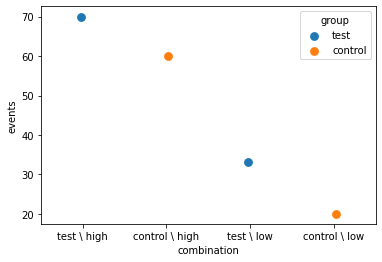

In [194]:
sns.pointplot(data=df2, x='combination', y='events', hue='group', dodge=True)

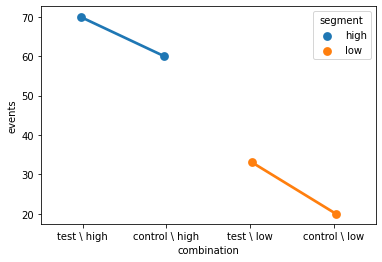

In [195]:
sns.pointplot(data=df2, x='combination', y='events', hue='segment', dodge=True)

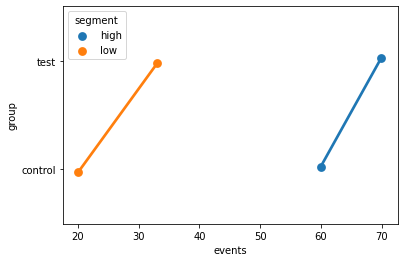

In [197]:
sns.pointplot(data=df2, x='events', y = 'group', hue='segment', dodge=True)

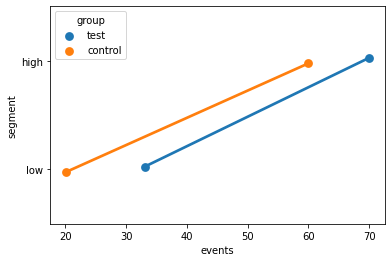

In [198]:
sns.pointplot(data=df2, x='events', y = 'segment', hue='group', dodge=True)